## Handwritten Image Detection with Keras using MNIST data

In this exercise we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [21]:
# Preliminaries

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [22]:
# Load the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [23]:
x_train[0].shape

(28, 28)

In [24]:
#Let's just look at a particular example to see what is inside

x_train[333]  ## Just a 28 x 28 numpy array of ints from 0 to 255

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [25]:
# What is the corresponding label in the training set?
y_train[333]

8

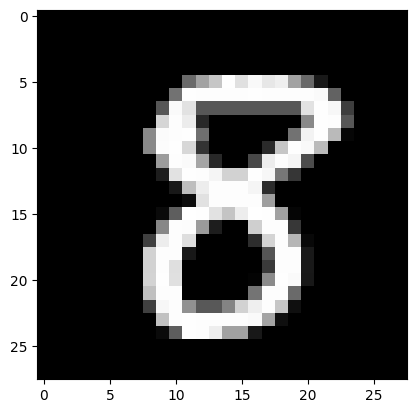

In [26]:
# Let's see what this image actually looks like

plt.imshow(x_train[333], cmap='Greys_r')

In [27]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [28]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [29]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [30]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [31]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization 
# of the loss function we had in binary classification case, to multi class case

In [33]:
# And now let's fit.

batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 2s 3ms/step - loss: 0.4993 - accuracy: 0.8500 - val_loss: 0.2084 - val_accuracy: 0.9369
Epoch 2/30
469/469 [==============================] - 1s 3ms/step - loss: 0.2513 - accuracy: 0.9259 - val_loss: 0.1523 - val_accuracy: 0.9521
Epoch 3/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1983 - accuracy: 0.9425 - val_loss: 0.1282 - val_accuracy: 0.9599
Epoch 4/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1699 - accuracy: 0.9496 - val_loss: 0.1163 - val_accuracy: 0.9657
Epoch 5/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1535 - accuracy: 0.9549 - val_loss: 0.1171 - val_accuracy: 0.9662
Epoch 6/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1398 - accuracy: 0.9581 - val_loss: 0.1051 - val_accuracy: 0.9691
Epoch 7/30
469/469 [==============================] - 1s 3ms/step - loss: 0.1314 - accuracy: 0.9618 - val_loss: 0.1015 - val_accuracy: 0.9709
Epoch 

In [34]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11345013231039047
Test accuracy: 0.9746999740600586


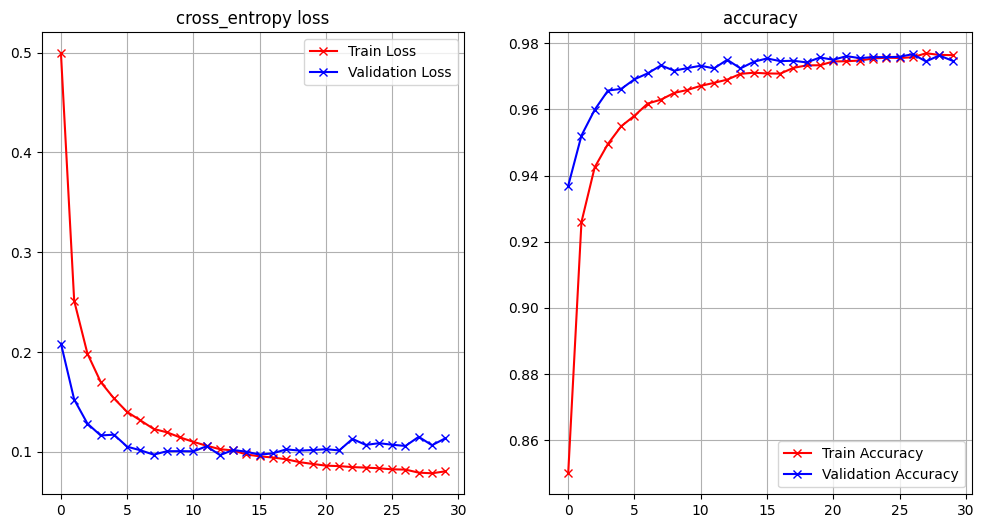

In [35]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128




In [36]:
model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 400)               314000    
                                                                 
 dropout_6 (Dropout)         (None, 400)               0         
                                                                 
 dense_10 (Dense)            (None, 300)               120300    
                                                                 
 dropout_7 (Dropout)         (None, 300)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                3010      
                                                                 
Total params: 437,310
Trainable params: 437,310
Non-trainable params: 0
_________________________________________________________________


In [41]:
learning_rate_2 = .001
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate_2),
              metrics=['accuracy'])

batch_size_2 = 128  # mini-batch with 128 examples
epochs_2 = 20
history_2 = model_2.fit(
    x_train, y_train,
    batch_size=batch_size_2,
    epochs=epochs_2,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 11s 21ms/step - loss: 0.0472 - accuracy: 0.9891 - val_loss: 0.1184 - val_accuracy: 0.9847
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0441 - accuracy: 0.9896 - val_loss: 0.1166 - val_accuracy: 0.9821
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0439 - accuracy: 0.9896 - val_loss: 0.1213 - val_accuracy: 0.9826
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0467 - accuracy: 0.9890 - val_loss: 0.1154 - val_accuracy: 0.9843
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0423 - accuracy: 0.9898 - val_loss: 0.1309 - val_accuracy: 0.9832
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0404 - accuracy: 0.9905 - val_loss: 0.1208 - val_accuracy: 0.9840
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0424 - accuracy: 0.9902 - val_loss: 0.1204 - val_accuracy: 0.9827
Epo

Test loss model_1: 0.11345013231039047
Test accuracy model_1: 0.9746999740600586
Test loss model_2: 0.10370828956365585
Test accuracy model_2: 0.9815999865531921


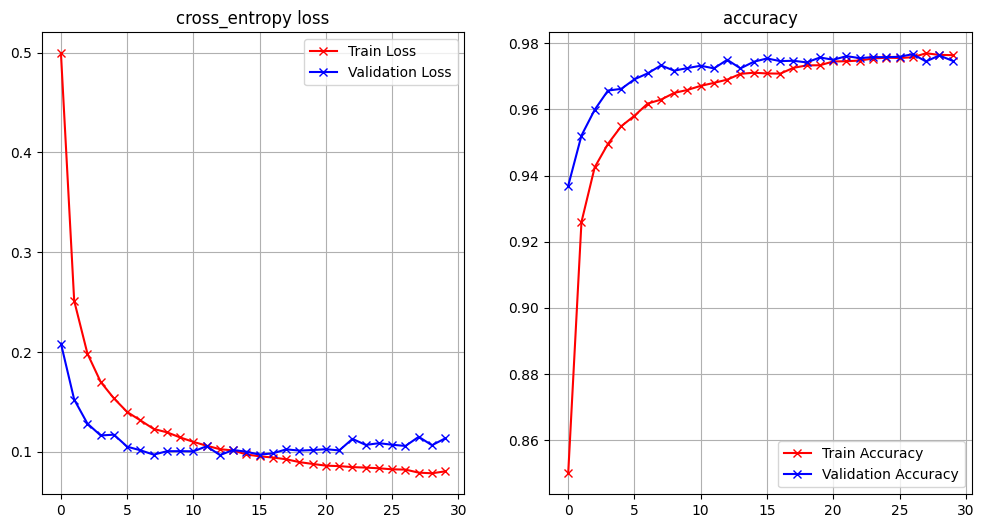

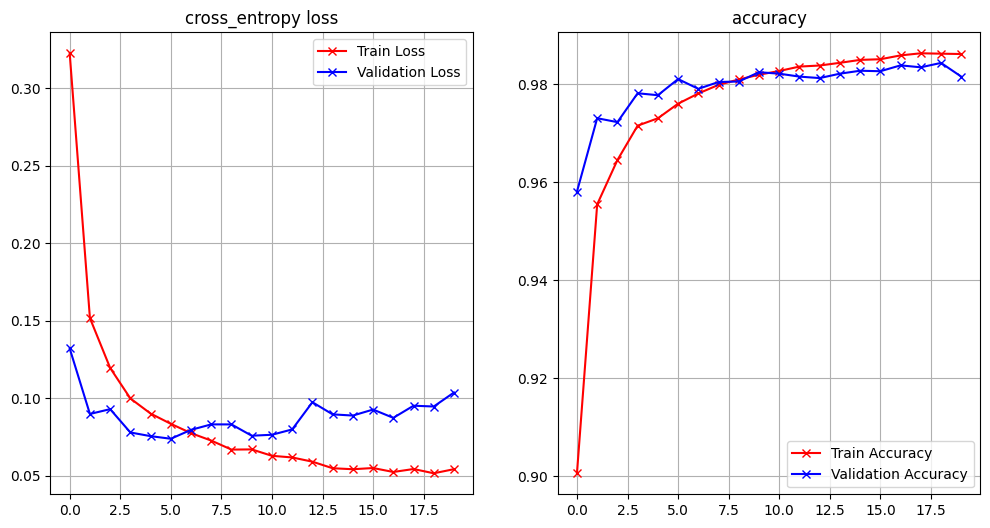

In [38]:

score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss model_1:', score[0])
print('Test accuracy model_1:', score[1])
print('Test loss model_2:', score_2[0])
print('Test accuracy model_2:', score_2[1])
plot_loss_accuracy(history)
plot_loss_accuracy(history_2)

## Think about the following questions

1) How do model_1 and model_2 compare? Which do you prefer? If you were going to put one into production, which would you choose and why?

É possível observar que o model_2 é mais agressivo ao aprender a medida que, considerando a mesma quantidade de épocas, o mesmo atingiu acurácias maiores. Entretanto, quanto mais épocas, o modelo 2 tende a piorar seu resultado nos testes. Ao fim da execução dos dois, o modelo 2 obteve uma acurácia cerca de 1% maior, porém os dados da loss function mostram uma tendencia de crescimento no erro e, além disso, a acurácia também apresentou uma tendência de queda brusca. Desta forma, optariamos pelo modelo 1 por ser mais consistente e generalizar de forma mais precisa novos dados, mesmo atingindo uma acurácia menor. Considerando um sistema em produção, é mais interessante optar por um sistema que futuramente precise de mais poder computacional para aprender com uma base de dados maior, do que precisar gerar um modelo novo pois o model_2 pode divergir para mais treinos.

2) Compare the trajectories of the loss function on the training set and test set for each model? How do they compare? What does that suggest about each model? Do the same for accuracy? Which do you think is more meaningful, the loss or the accuracy?
Como já dito, o model_1 aprende mais devagar, porém com menos oscilação. Já na acurácia, os dois evoluem de forma semelhante. Dessa forma, a loss function nos trás mais dados para uma análise dos modelos, nesse caso específico.


3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model. Try it out below? Did it improve the performance?
Inicialmente, vamos igualar o número de épocas do model_2 para que possamos alterar os demais parâmetros com mais precisão.

Epoch 1/30


c:\Users\h8men\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\legacy\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


469/469 [==============================] - 5s 9ms/step - loss: 0.3237 - accuracy: 0.9014 - val_loss: 0.1304 - val_accuracy: 0.9594
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 0.1517 - accuracy: 0.9554 - val_loss: 0.0954 - val_accuracy: 0.9727
Epoch 3/30
469/469 [==============================] - 5s 12ms/step - loss: 0.1175 - accuracy: 0.9653 - val_loss: 0.0874 - val_accuracy: 0.9744
Epoch 4/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0988 - accuracy: 0.9710 - val_loss: 0.0812 - val_accuracy: 0.9771
Epoch 5/30
469/469 [==============================] - 7s 15ms/step - loss: 0.0934 - accuracy: 0.9737 - val_loss: 0.0794 - val_accuracy: 0.9785
Epoch 6/30
469/469 [==============================] - 6s 13ms/step - loss: 0.0828 - accuracy: 0.9760 - val_loss: 0.0771 - val_accuracy: 0.9798
Epoch 7/30
469/469 [==============================] - 6s 12ms/step - loss: 0.0782 - accuracy: 0.9774 - val_loss: 0.0846 - val_accuracy: 0.9794
Epoch 8/30
4

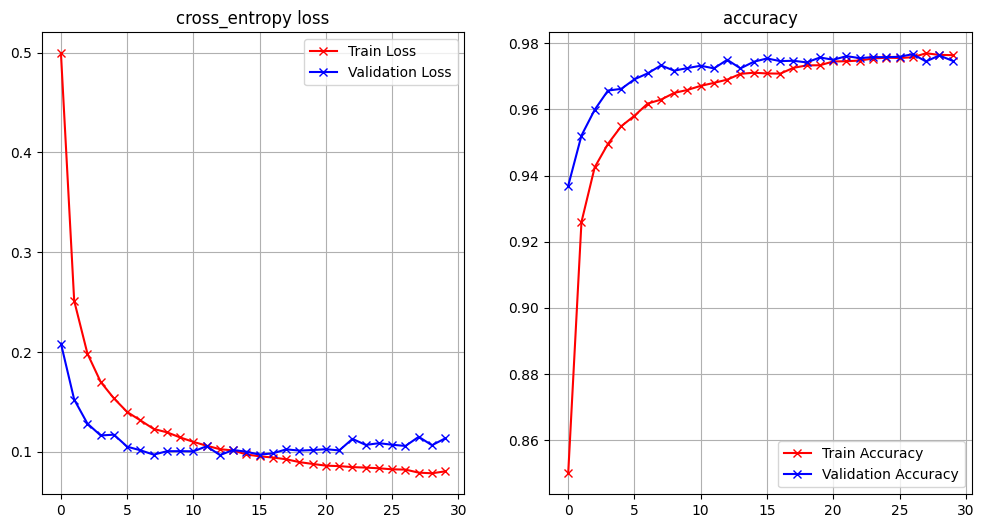

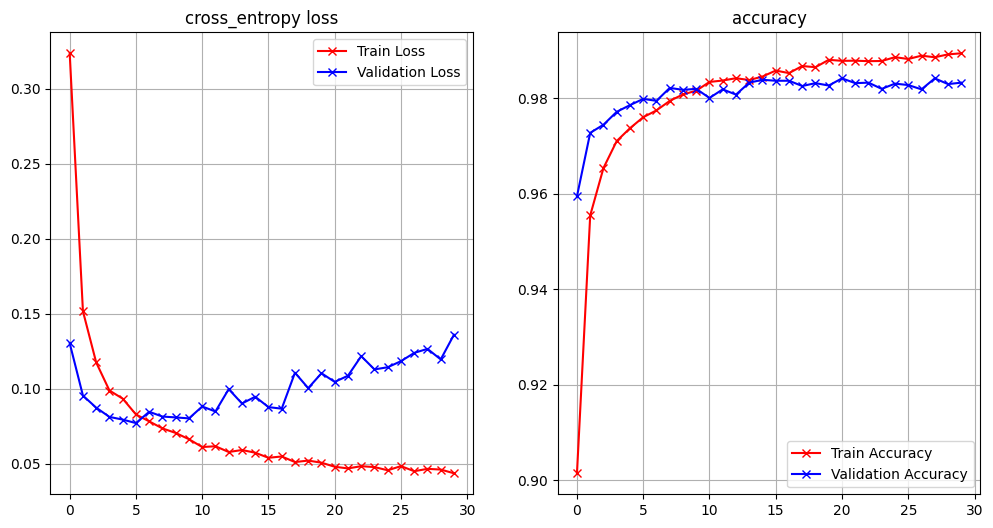

In [43]:
model_21 = Sequential()
model_21.add(Dense(400, activation='relu', input_shape=(784,)))
model_21.add(Dropout(0.4))
model_21.add(Dense(300, activation='relu'))
model_21.add(Dropout(0.4))
model_21.add(Dense(10, activation='softmax'))
learning_rate_21 = .001
model_21.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate_21),
              metrics=['accuracy'])

batch_size_21 = 128  # mini-batch with 128 examples
epochs_21 = 30
history_21 = model_21.fit(
    x_train, y_train,
    batch_size=batch_size_21,
    epochs=epochs_21,
    verbose=1,
    validation_data=(x_test, y_test))
score_21 = model_21.evaluate(x_test, y_test, verbose=0)
print('Test loss model_1:', score[0])
print('Test accuracy model_1:', score[1])
print('Test loss model_2:', score_21[0])
print('Test accuracy model_2:', score_21[1])
plot_loss_accuracy(history)
plot_loss_accuracy(history_21)

Com o ajuste feito é possível reparar melhor ainda os detalhes citados nas outras questões.
Em seguida, iremos adicionar uma hidden layer a mais para tentar estabilizar o aumento brusco de erro de validação. 

Epoch 1/30
469/469 [==============================] - 5s 9ms/step - loss: 0.3762 - accuracy: 0.8840 - val_loss: 0.1353 - val_accuracy: 0.9602
Epoch 2/30
469/469 [==============================] - 7s 15ms/step - loss: 0.1732 - accuracy: 0.9506 - val_loss: 0.1049 - val_accuracy: 0.9686
Epoch 3/30
469/469 [==============================] - 10s 22ms/step - loss: 0.1385 - accuracy: 0.9619 - val_loss: 0.0939 - val_accuracy: 0.9732
Epoch 4/30
469/469 [==============================] - 8s 18ms/step - loss: 0.1209 - accuracy: 0.9669 - val_loss: 0.0870 - val_accuracy: 0.9774
Epoch 5/30
469/469 [==============================] - 7s 16ms/step - loss: 0.1112 - accuracy: 0.9699 - val_loss: 0.0851 - val_accuracy: 0.9777
Epoch 6/30
469/469 [==============================] - 9s 19ms/step - loss: 0.1043 - accuracy: 0.9726 - val_loss: 0.0821 - val_accuracy: 0.9789
Epoch 7/30
469/469 [==============================] - 12s 25ms/step - loss: 0.0991 - accuracy: 0.9744 - val_loss: 0.0882 - val_accuracy: 0.976

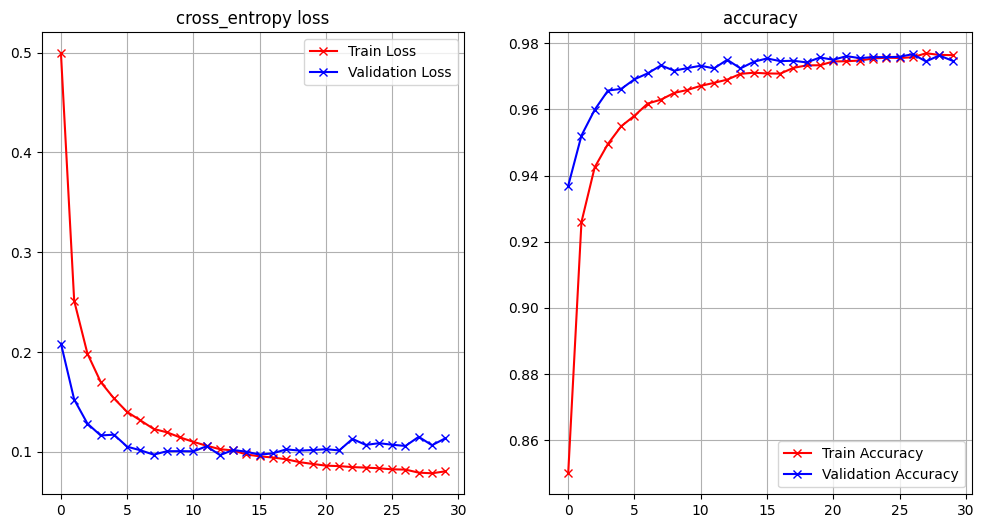

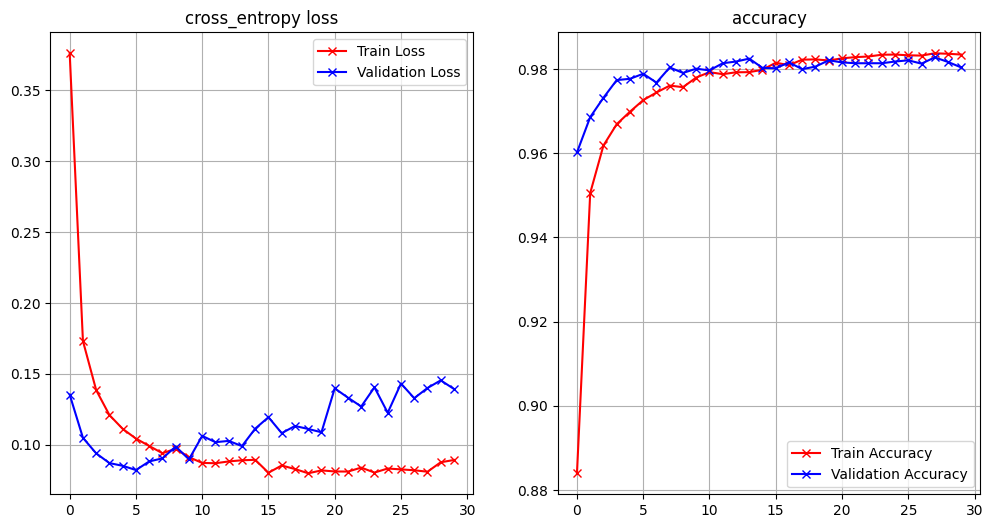

In [50]:
model_22 = Sequential()
model_22.add(Dense(400, activation='relu', input_shape=(784,)))
model_22.add(Dropout(0.4))
model_22.add(Dense(300, activation='relu'))
model_22.add(Dropout(0.4))
model_22.add(Dense(300, activation='relu'))
model_22.add(Dropout(0.4))
model_22.add(Dense(10, activation='softmax'))
learning_rate_22 = .001
model_22.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate_22),
              metrics=['accuracy'])

batch_size_22 = 128  # mini-batch with 128 examples
epochs_22 = 30
history_22 = model_22.fit(
    x_train, y_train,
    batch_size=batch_size_22,
    epochs=epochs_22,
    verbose=1,
    validation_data=(x_test, y_test))
score_22 = model_22.evaluate(x_test, y_test, verbose=0)
print('Test loss model_1:', score[0])
print('Test accuracy model_1:', score[1])
print('Test loss model_2:', score_22[0])
print('Test accuracy model_2:', score_22[1])
plot_loss_accuracy(history)
plot_loss_accuracy(history_22)

Com a alteração feita, a função loss da validação ainda apresentou uma tendência de crescimento, porém mais atenuado. A acurácia seguiu sendo superior ao do model_1. 